<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Joshua!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>General Feedback</b>  
 
Hello Joshua,  
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.
    
There are no critical issues left, so your project has been accepted! You can find my more detailed feedback within your project file in the `Reviewer's comment v1` section.

Wishing you interesting projects in the upcoming sprints! ☘️
</div>

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job adding additional information about the project goal. It would also be helpful to share the steps you plan to complete.

</div>

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df = pd.read_csv('games.csv')

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Check for duplicate entries
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

Total records:

In [5]:
df.shape

(16715, 11)

Data types:

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Obvious issues: missing values, wrong data type for some columns

In [7]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Patterns or abnormalities: none

In [8]:
print(df['Year_of_Release'].sort_values().unique()[:10])
print(df['Genre'].value_counts())

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989.]
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [9]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [10]:
# Verify the changes
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Regarding the column name changes, everything is correct. The most common convention in Python is to use snake case (e.g., `first_name`). You can read more about this naming style here:

https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

Using snake case improves readability and follows the standard Python style guide.
</div>

### 2.2 Data Type Conversion

In [11]:
# Check current data types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [12]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

# Convert 'year_of_release' to Int64 (allows for missing values)
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

# Handle 'tbd' in 'user_score'
df['user_score'] = df['user_score'].replace('tbd', pd.NA)

# Convert 'user_score' to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [13]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

user_score: Was object because of 'tbd' (non-numeric values). Replaced 'tbd' with NaN, then converted to float64 for proper numerical analysis.

### 2.3 Handling Missing Values

In [14]:
# Examine missing values
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [15]:
# Calculate percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.round(2))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job checking both the absolute numbers and the percentages of missing values in your dataset. This thorough approach helps ensure you have a clear understanding of the extent of missing data and its potential impact on your analysis. 


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
Additionally, it could be interesting to check the percentage of missing values, as this helps to understand the overall impact. You could also consider creating a table to present this information:  

```pyton
    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)
```

In [16]:
# Analyze patterns in missing values

In [17]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

# Drop rows with missing 'name'
df = df.dropna(subset=['name']).copy()  # Use .copy() to prevent chained assignment issues

# Fill missing 'rating' with 'Unknown'
df.loc[:, 'rating'] = df['rating'].fillna('Unknown')

# Fill missing 'year_of_release' with the mode
most_common_year = df['year_of_release'].mode().iloc[0]
df.loc[:, 'year_of_release'] = df['year_of_release'].fillna(most_common_year)

In [18]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

Why might these values be missing?

Name: Possibly data entry errors or placeholder rows.

User Score / Critic Score: The game might be new or not reviewed.

Rating: Missing ESRB ratings could be due to international games or indie releases.

Year: Data could’ve been scraped from multiple sources with inconsistencies.

Why we handled them this way:

Dropped rows missing name since a game with no name can’t be analyzed meaningfully.

Filled rating and year_of_release to avoid dropping too many rows.

Left review scores (critic_score, user_score) blank because missing scores might be meaningful (not reviewed yet) and imputing them could distort the results.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job evaluating the missing values-everything is correct here! 👏 

### 2.4 Calculate Total Sales

In [19]:
# Calculate total sales across all regions and put them in a different column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Great job-everything is correct here!

As an alternative approach, you could also calculate total sales using the following method:
    
```python
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
```

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [20]:
# Create a DataFrame with game releases by year
games_per_year = df['year_of_release'].value_counts().sort_index().reset_index()
games_per_year.columns = ['year', 'release_count']

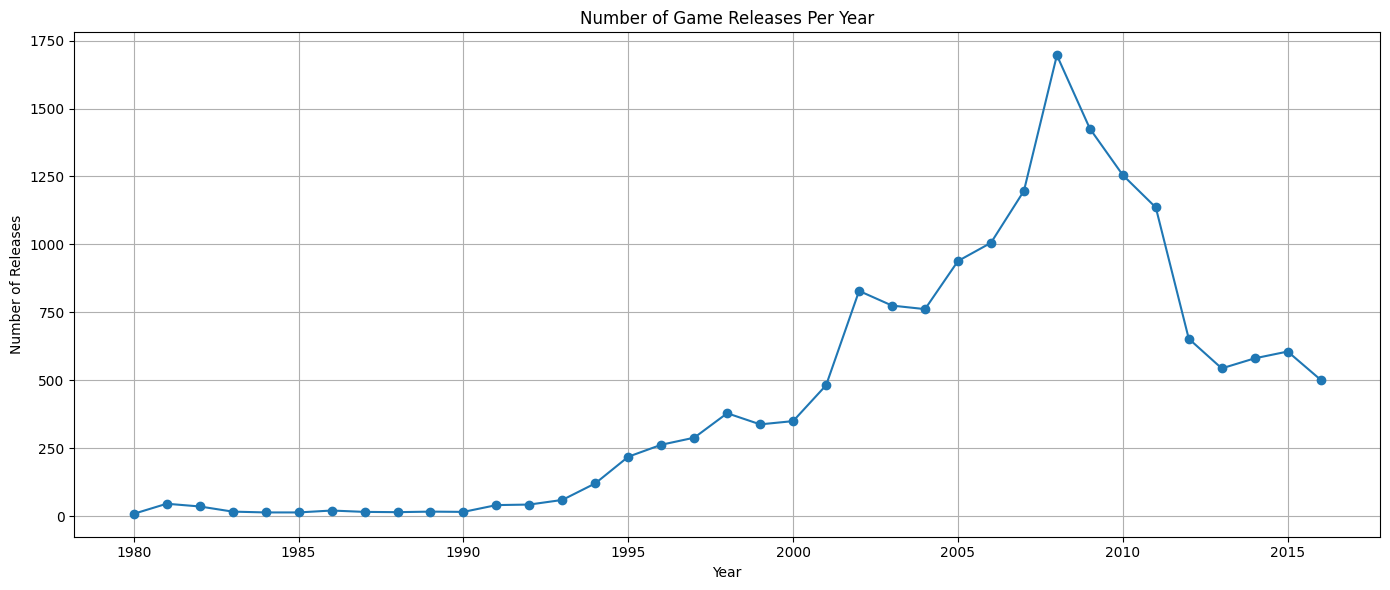

In [21]:
# Visualize the distribution of games across years
games_per_year['year'] = games_per_year['year'].astype(int)
games_per_year['release_count'] = games_per_year['release_count'].astype(int)

plt.figure(figsize=(14, 6))
plt.plot(games_per_year['year'], games_per_year['release_count'], marker='o')
plt.title('Number of Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great, it looks like there were almost no games before 1995.

</div>

In [22]:
# Display summary statistics for each year
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Group data by year and calculate summary statistics
yearly_summary = df.groupby('year_of_release').agg(
    num_releases=('name', 'count'),
    total_sales_sum=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean'),
    median_sales=('total_sales', 'median')
).reset_index()

# Display the summary statistics table to the user
print(yearly_summary)

    year_of_release  num_releases  total_sales_sum  avg_sales  median_sales
0              1980             9            11.38   1.264444         0.770
1              1981            46            35.68   0.775652         0.465
2              1982            36            28.88   0.802222         0.540
3              1983            17            16.80   0.988235         0.770
4              1984            14            50.35   3.596429         1.485
5              1985            14            53.95   3.853571         1.015
6              1986            21            37.08   1.765714         1.360
7              1987            16            21.70   1.356250         0.885
8              1988            15            47.21   3.147333         1.510
9              1989            17            73.45   4.320588         1.610
10             1990            16            49.37   3.085625         1.520
11             1991            41            32.23   0.786098         0.380
12          

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

2008–2011: The peak of the Xbox 360, PS3, and Wii generation

There is enough recent data to make predictions for 2017.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [23]:
# Calculate total sales by platform and year
platform_year_sales = df.groupby(['platform', 'year_of_release']).agg(
    total_sales=('total_sales', 'sum')
).reset_index()

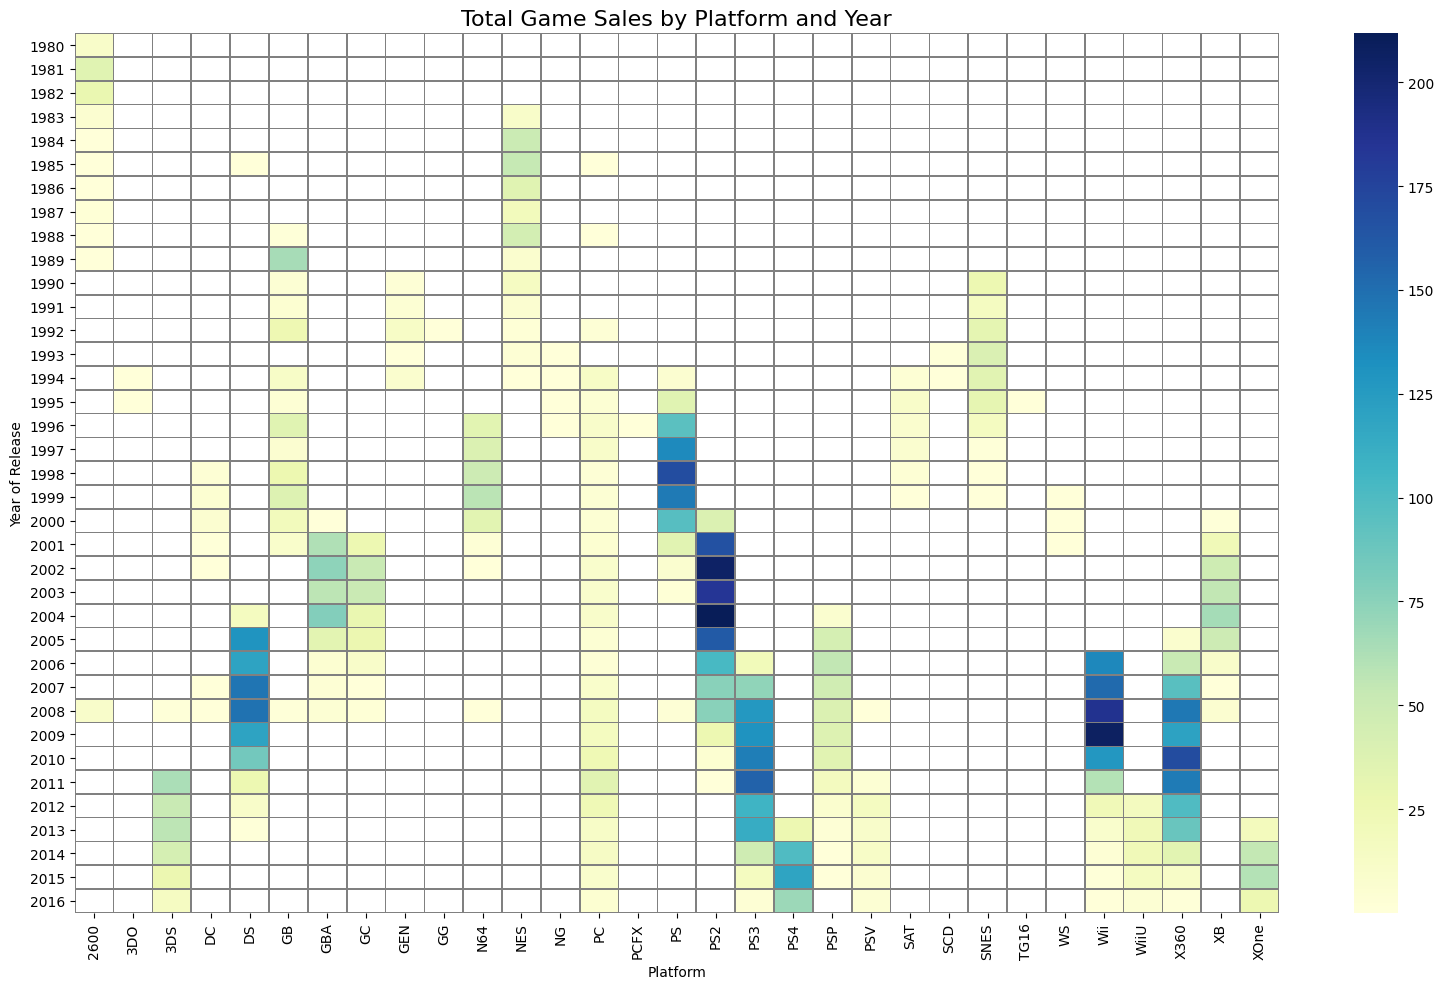

In [24]:
# Create a heatmap of platform sales over time
heatmap_data = platform_year_sales.pivot(index='year_of_release', columns='platform', values='total_sales')

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title('Total Game Sales by Platform and Year', fontsize=16)
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.tight_layout()
plt.show()

In [25]:
# Identify platforms with declining sales

# Convert year_of_release to regular integers for regression
platform_sales_trend = df.groupby(['platform', 'year_of_release']).agg(
    total_sales=('total_sales', 'sum')
).reset_index()
platform_sales_trend['year_of_release'] = platform_sales_trend['year_of_release'].astype(int)

# Calculate trend (slope) for each platform
trend_data = []

for platform in platform_sales_trend['platform'].unique():
    data = platform_sales_trend[platform_sales_trend['platform'] == platform]
    if len(data) >= 5:  # Ensure enough data points for trend
        slope, intercept, r_value, p_value, std_err = linregress(data['year_of_release'], data['total_sales'])
        trend_data.append({'platform': platform, 'slope': slope})

# Create DataFrame and sort by slope to find declining platforms
trend_df = pd.DataFrame(trend_data)
declining_platforms = trend_df[trend_df['slope'] < 0].sort_values(by='slope')

declining_platforms.head(10)

,platform,slope
18,Wii,-21.327909
12,PS2,-14.446119
6,GC,-6.499167
11,PS,-5.714696
13,PS3,-5.633273
5,GBA,-5.256000
8,N64,-4.347054
20,X360,-4.293007
9,NES,-3.841084
14,PSP,-3.834580


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

We can define consistent platforms as those with:

A slope near zero in their sales trend

At least 5+ years of data, meaning they’ve been around long enough to show stability

DS, PSP, PC show consistent sales over time.

Yes — platforms that:

Had high sales followed by steep decline

Had no sales in the last few years of the dataset

These include: Wii, PS2, GameCube, N64, Xbox 360, GBA, NES, Atari 2600

A gaming platform usually follows this pattern:

Launch(Year 1)-Slow sales, limited game library

Growth(Years 2–4)-Rapid game release increases, rising sales

Peak(Years 5–6)-Highest sales and game releases

Decline(Years 7–10)-Sales taper off as a new generation arrives

End of Life-Few new releases

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle. We can see that only a small subset of the platform still has sales.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [26]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

# Define relevant years for prediction
relevant_years = [2013, 2014, 2015, 2016]

# Filter the dataset
df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Confirm filtered data
print(df_relevant['year_of_release'].value_counts().sort_index())

2013    544
2014    581
2015    606
2016    502
Name: year_of_release, dtype: Int64


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Everything is correct! Data has been filtered correctly, as we want to evaluate only recent trends. 

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

2013-2016

These years reflect the current console generation at the time (PS4, XOne, 3DS).

They exclude discontinued platforms (e.g., Wii, PS2).

They provide a reliable baseline for 2017 since 2016 is likely the most recent complete year in the dataset.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [27]:
# Analyze platform sales trends
platform_performance = df_relevant.groupby('platform').agg(
    total_sales=('total_sales', 'sum'),
    num_games=('name', 'count'),
    avg_sales_per_game=('total_sales', 'mean')
).reset_index()

platform_performance.head(10)

,platform,total_sales,num_games,avg_sales_per_game
0,3DS,143.25,303,0.472772
1,DS,1.54,8,0.192500
2,PC,39.43,189,0.208624
3,PS3,181.43,345,0.525884
4,PS4,314.14,392,0.801378
5,PSP,3.50,67,0.052239
6,PSV,32.99,358,0.092151
7,Wii,13.66,23,0.593913
8,WiiU,64.63,115,0.562000
9,X360,136.80,186,0.735484


In [28]:
# Sort platforms by total sales
sorted_platforms = platform_performance.sort_values(by='total_sales', ascending=False)

# Show the full sorted list
sorted_platforms.reset_index(drop=True)

,platform,total_sales,num_games,avg_sales_per_game
0,PS4,314.14,392,0.801378
1,PS3,181.43,345,0.525884
2,XOne,159.32,247,0.645020
3,3DS,143.25,303,0.472772
4,X360,136.80,186,0.735484
5,WiiU,64.63,115,0.562000
6,PC,39.43,189,0.208624
7,PSV,32.99,358,0.092151
8,Wii,13.66,23,0.593913
9,PSP,3.50,67,0.052239


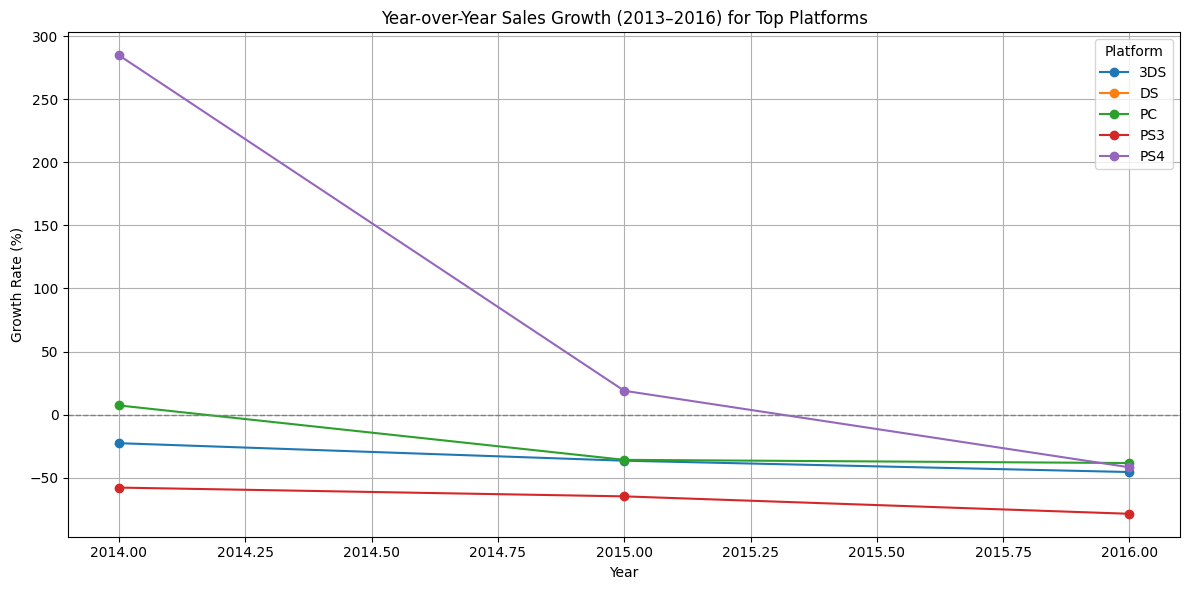

In [29]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

# Calculate total sales per platform per year
platform_year_sales = df_relevant.groupby(['platform', 'year_of_release']).agg(
    total_sales=('total_sales', 'sum')
).reset_index()

# Calculate year-over-year growth for each platform
platform_year_sales['sales_growth'] = platform_year_sales.groupby('platform')['total_sales'].pct_change() * 100

# Plot year-over-year growth for top platforms (based on total sales)
top_platforms = platform_performance.head(5)['platform'].tolist()
top_growth_data = platform_year_sales[platform_year_sales['platform'].isin(top_platforms)]

# Create the plot
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = top_growth_data[top_growth_data['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['sales_growth'], marker='o', label=platform)

plt.title('Year-over-Year Sales Growth (2013–2016) for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

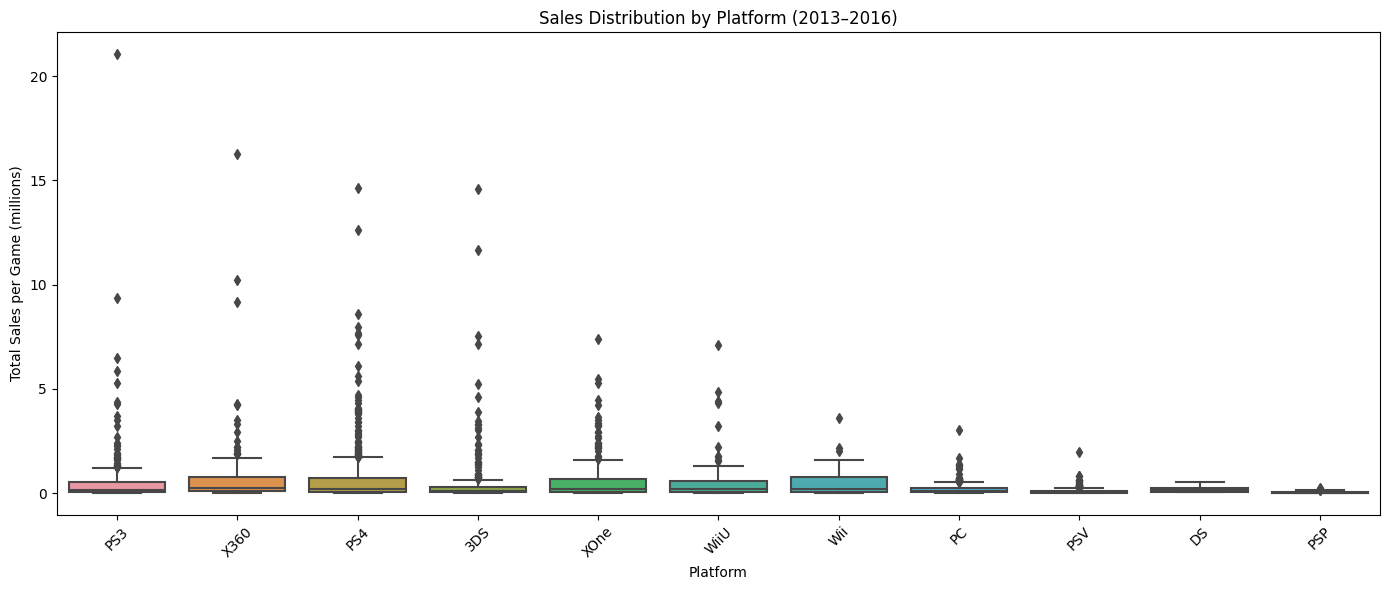

In [30]:
# Create box plot of sales by platform

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')

plt.title('Sales Distribution by Platform (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales per Game (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Calculate detailed statistics for each platform


detailed_stats = df_relevant.groupby('platform')['total_sales'].describe().reset_index()

# Rename columns for clarity
detailed_stats.columns.name = None
detailed_stats = detailed_stats.rename(columns={
    'count': 'num_games',
    'mean': 'avg_sales',
    'std': 'std_dev',
    'min': 'min_sales',
    '25%': 'q1',
    '50%': 'median',
    '75%': 'q3',
    'max': 'max_sales'
})

# Display the detailed statistics
detailed_stats.sort_values(by='avg_sales', ascending=False).reset_index(drop=True)

,platform,num_games,avg_sales,std_dev,min_sales,q1,median,q3,max_sales
0,PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
1,X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
2,XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
3,Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
4,WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
5,PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
6,3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
7,PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
8,DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
9,PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [32]:
# Choose a popular platform based on your previous analysis

popular_platform = 'PS4'

# Filter data for the chosen platform and relevant years
df_platform = df_relevant[df_relevant['platform'] == popular_platform].copy()

# Remove entries with missing critic or user scores
df_platform = df_platform.dropna(subset=['critic_score', 'user_score'])

# Ensure user_score is numeric (some values may still be non-numeric or previously missed)
df_platform['user_score'] = pd.to_numeric(df_platform['user_score'], errors='coerce')
df_platform = df_platform.dropna(subset=['user_score'])

In [33]:
# Create scatter plots for both critic and user scores

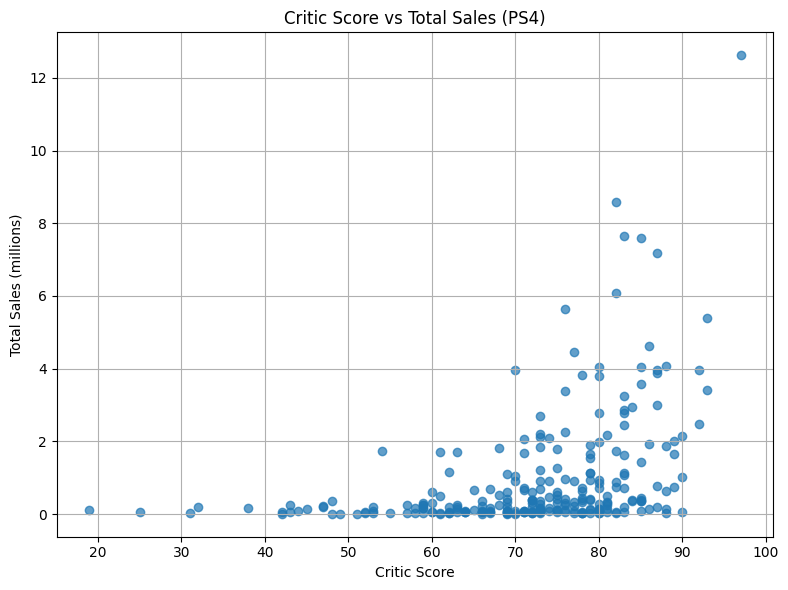

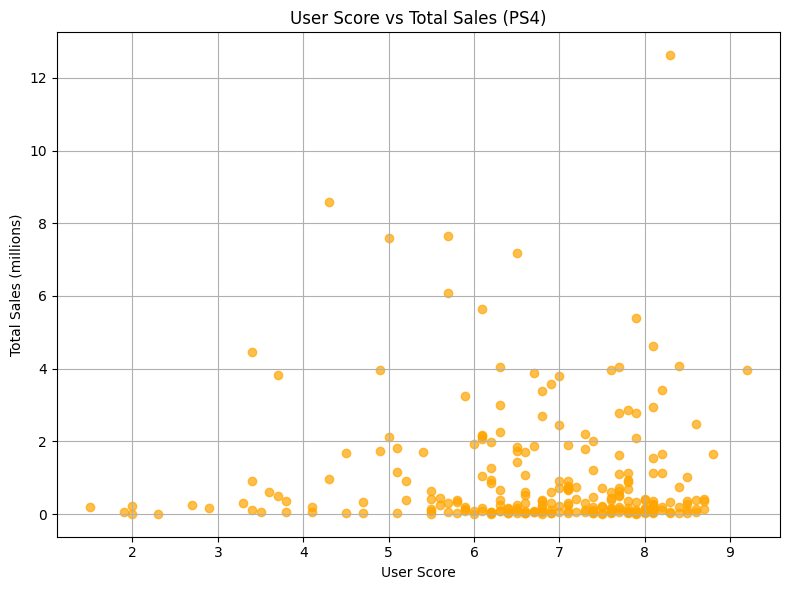

(0.40589480145836687, -0.03362497596528878)

In [34]:
# Critic Scores

plt.figure(figsize=(8, 6))
plt.scatter(df_platform['critic_score'], df_platform['total_sales'], alpha=0.7)
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# User Scores

plt.figure(figsize=(8, 6))
plt.scatter(df_platform['user_score'], df_platform['total_sales'], alpha=0.7, color='orange')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlations

critic_corr = df_platform['critic_score'].corr(df_platform['total_sales'])
user_corr = df_platform['user_score'].corr(df_platform['total_sales'])

# Display the correlation values
critic_corr, user_corr

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [35]:
# Find games released on multiple platforms

# Group by 'name' and count the number of unique platforms
multi_platform_counts = df.groupby('name')['platform'].nunique().reset_index()
multi_platform_counts = multi_platform_counts.rename(columns={'platform': 'platform_count'})

# Filter for games with more than one platform
multi_platform_games = multi_platform_counts[multi_platform_counts['platform_count'] > 1]

# Merge with the original DataFrame to get full records for those games
df_multi_platform = df.merge(multi_platform_games[['name']], on='name', how='inner')

# Display a sample of multi-platform games
df_multi_platform[['name', 'platform', 'year_of_release', 'total_sales']].head(10)

,name,platform,year_of_release,total_sales
0,Super Mario Bros.,NES,1985,40.24
1,Super Mario Bros.,GB,1999,5.07
2,Tetris,GB,1989,30.26
3,Tetris,NES,1988,5.58
4,Grand Theft Auto V,PS3,2013,21.05
5,Grand Theft Auto V,X360,2013,16.27
6,Grand Theft Auto V,PS4,2014,12.62
7,Grand Theft Auto V,XOne,2014,5.47
8,Grand Theft Auto V,PC,2015,1.17
9,Grand Theft Auto: San Andreas,PS2,2004,20.81


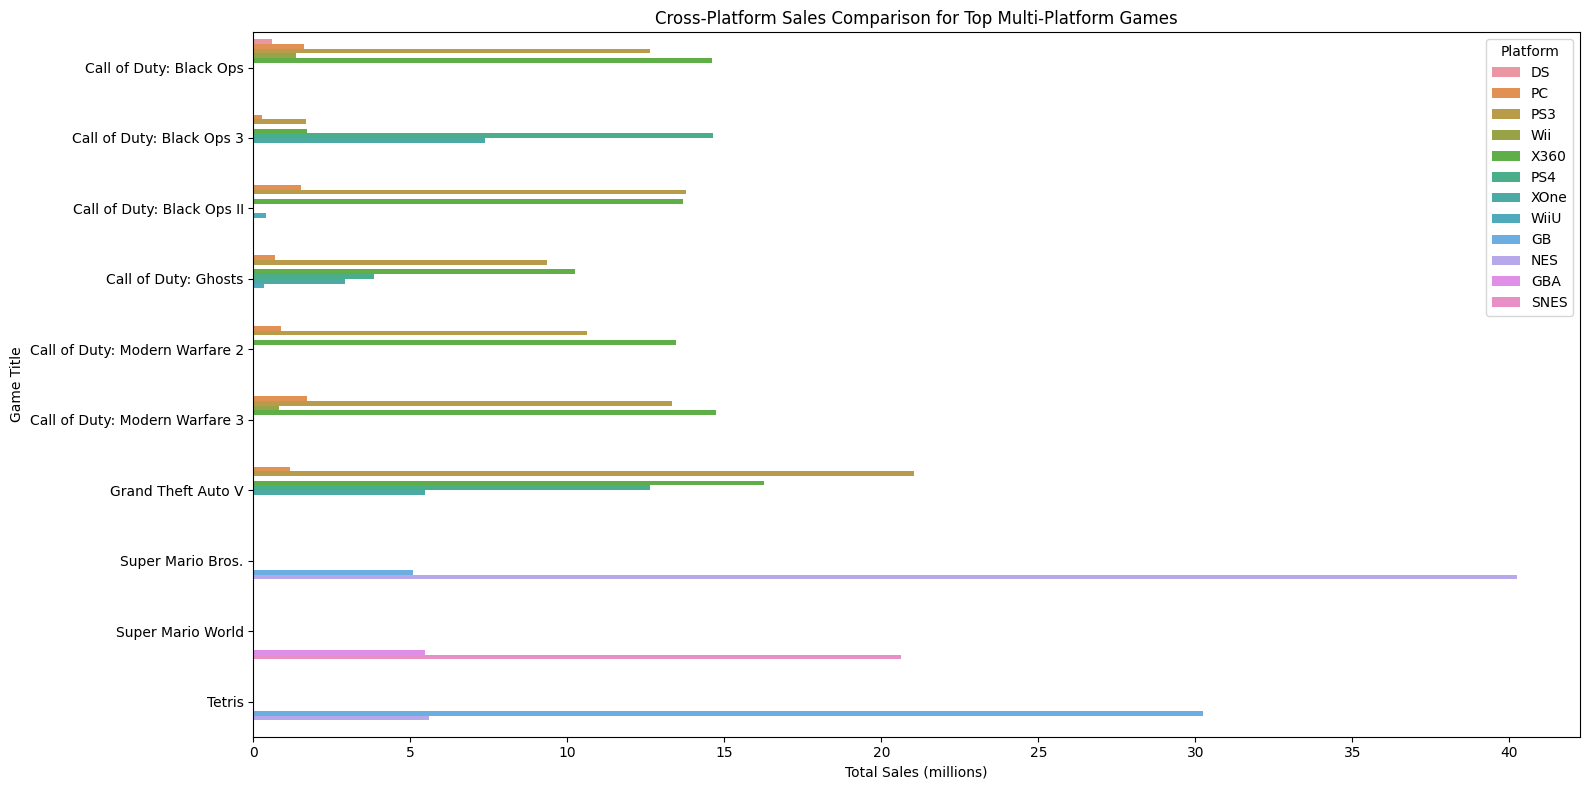

In [36]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance

# Aggregate total sales for each game-platform combination
cross_platform_sales = df_multi_platform.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Select top multi-platform games by total sales across all platforms
top_multi_platform_games = (
    cross_platform_sales.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter to those top games
top_games_data = cross_platform_sales[cross_platform_sales['name'].isin(top_multi_platform_games)]

# Plot sales comparison for top multi-platform games
plt.figure(figsize=(16, 8))
sns.barplot(data=top_games_data, x='total_sales', y='name', hue='platform')
plt.title('Cross-Platform Sales Comparison for Top Multi-Platform Games')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Game Title')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [37]:
# Analyze genre performance

genre_performance = df_relevant.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    num_games=('name', 'count'),
    avg_sales_per_game=('total_sales', 'mean')
).reset_index()

# Show the top genres
genre_performance.head(10)

,genre,total_sales,num_games,avg_sales_per_game
0,Action,321.87,766,0.420196
1,Adventure,23.64,245,0.096490
2,Fighting,35.31,80,0.441375
3,Misc,62.82,155,0.405290
4,Platform,42.63,74,0.576081
5,Puzzle,3.17,17,0.186471
6,Racing,39.89,85,0.469294
7,Role-Playing,145.89,292,0.499623
8,Shooter,232.98,187,1.245882
9,Simulation,21.76,62,0.350968


In [38]:
# Sort genres by total sales

sorted_genres = genre_performance.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Display sorted genres
sorted_genres

,genre,total_sales,num_games,avg_sales_per_game
0,Action,321.87,766,0.420196
1,Shooter,232.98,187,1.245882
2,Sports,150.65,214,0.703972
3,Role-Playing,145.89,292,0.499623
4,Misc,62.82,155,0.405290
5,Platform,42.63,74,0.576081
6,Racing,39.89,85,0.469294
7,Fighting,35.31,80,0.441375
8,Adventure,23.64,245,0.096490
9,Simulation,21.76,62,0.350968


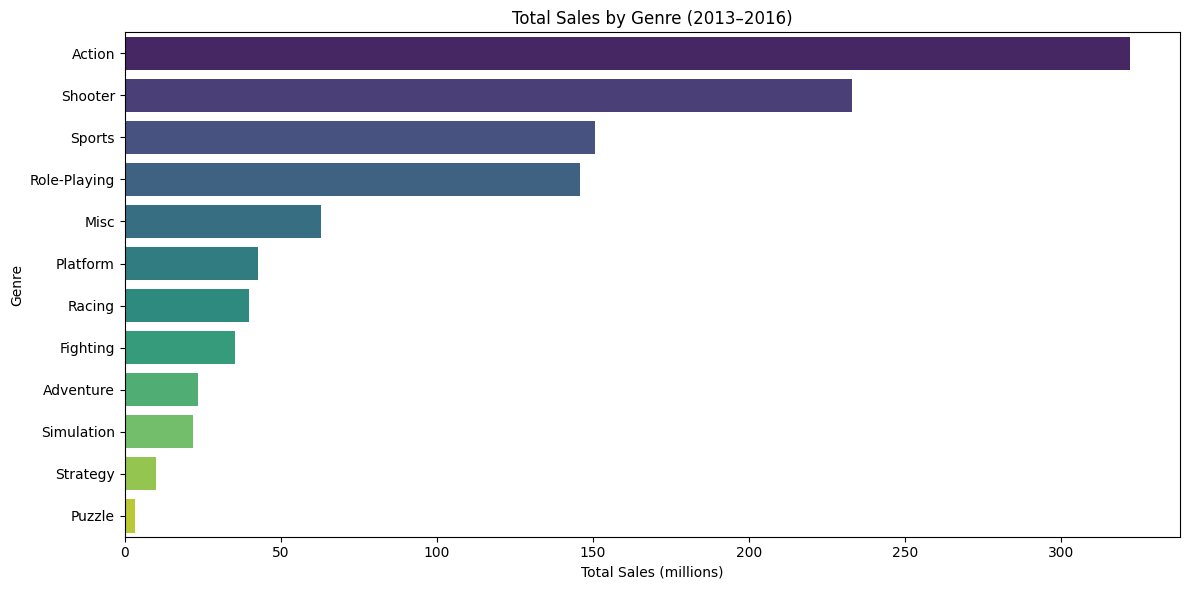

In [39]:
# Visualize genre distribution

plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_genres, x='total_sales', y='genre', palette='viridis')
plt.title('Total Sales by Genre (2013–2016)')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [40]:
# Calculate market share for each genre

total_sales_all_genres = sorted_genres['total_sales'].sum()
sorted_genres['market_share_%'] = (sorted_genres['total_sales'] / total_sales_all_genres) * 100

# Display with market share
sorted_genres[['genre', 'total_sales', 'market_share_%']].sort_values(by='market_share_%', ascending=False).reset_index(drop=True)

,genre,total_sales,market_share_%
0,Action,321.87,29.510677
1,Shooter,232.98,21.360790
2,Sports,150.65,13.812357
3,Role-Playing,145.89,13.375936
4,Misc,62.82,5.759657
5,Platform,42.63,3.908535
6,Racing,39.89,3.657318
7,Fighting,35.31,3.237400
8,Adventure,23.64,2.167435
9,Simulation,21.76,1.995067


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

Action leads in total sales, while Shooter dominates in average performance per title.


Genres in Decline:

Action: from 122.51M → 30.11M

Shooter: 62.04M → 38.22M

Sports: 41.17M → 23.49M

Misc, Platform, Racing, Simulation: all saw sharp drop-offs


Genres Holding or Slightly Growing:

RPG (Role-Playing): Peaked in 2014, softer decline after

Adventure: Low but relatively stable

Fighting: Bounced up in 2014 before falling again


Shooter games lead with an impressive average — driven by blockbuster franchises like Call of Duty and Battlefield.

Adventure, Puzzle, and Strategy games tend to underperform on average — often more niche or indie-focused.

Sports and Platformers also show strong, consistent performance.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great evaluation! This could be a valuable insight for a store manager.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [41]:
# Function to analyze platform performance by region
def analyze_platform_performance_by_region(df, region_col):
    platform_region_sales = df.groupby('platform')[region_col].sum().reset_index()
    platform_region_sales = platform_region_sales.sort_values(by=region_col, ascending=False).reset_index(drop=True)
    return platform_region_sales


In [42]:
# Analyze each region
na_platform_sales = analyze_platform_performance_by_region(df_relevant, 'na_sales')
eu_platform_sales = analyze_platform_performance_by_region(df_relevant, 'eu_sales')
jp_platform_sales = analyze_platform_performance_by_region(df_relevant, 'jp_sales')

na_platform_sales, eu_platform_sales, jp_platform_sales

(   platform  na_sales
 0       PS4    108.74
 1      XOne     93.12
 2      X360     81.66
 3       PS3     63.50
 4       3DS     38.20
 5      WiiU     29.21
 6        PC     11.11
 7       Wii      6.56
 8       PSV      5.04
 9        DS      0.57
 10      PSP      0.00,
    platform  eu_sales
 0       PS4    141.09
 1       PS3     67.81
 2      XOne     51.59
 3      X360     42.52
 4       3DS     30.96
 5        PC     25.36
 6      WiiU     19.85
 7       PSV      6.10
 8       Wii      5.93
 9        DS      0.85
 10      PSP      0.17,
    platform  jp_sales
 0       3DS     67.81
 1       PS3     23.35
 2       PSV     18.59
 3       PS4     15.96
 4      WiiU     10.88
 5       PSP      3.29
 6      X360      0.51
 7      XOne      0.34
 8       Wii      0.05
 9        DS      0.00
 10       PC      0.00)

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [43]:
# Create a comparative platform analysis

# Merge regional platform sales into one dataframe for comparison
platform_comparison = na_platform_sales.merge(eu_platform_sales, on='platform', how='outer')
platform_comparison = platform_comparison.merge(jp_platform_sales, on='platform', how='outer')

# Replace any missing values with 0 (in case any platform didn't appear in a region)
platform_comparison.fillna(0, inplace=True)

# Calculate total global sales for these regions combined
platform_comparison['total_sales'] = platform_comparison['na_sales'] + platform_comparison['eu_sales'] + platform_comparison['jp_sales']

# Sort by total sales for clarity
platform_comparison = platform_comparison.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

platform_comparison

,platform,na_sales,eu_sales,jp_sales,total_sales
0,PS4,108.74,141.09,15.96,265.79
1,PS3,63.50,67.81,23.35,154.66
2,XOne,93.12,51.59,0.34,145.05
3,3DS,38.20,30.96,67.81,136.97
4,X360,81.66,42.52,0.51,124.69
5,WiiU,29.21,19.85,10.88,59.94
6,PC,11.11,25.36,0.00,36.47
7,PSV,5.04,6.10,18.59,29.73
8,Wii,6.56,5.93,0.05,12.54
9,PSP,0.00,0.17,3.29,3.46


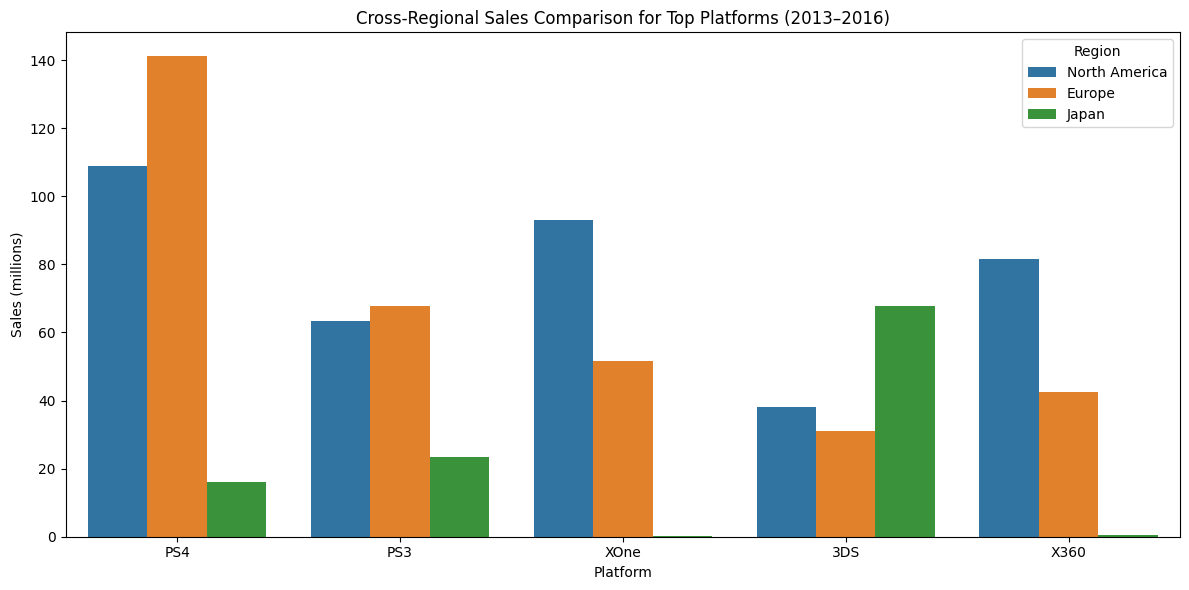

In [44]:
# Visualize cross-regional comparison for top platforms

# Select top 5 platforms by total sales
top_platforms = platform_comparison.head(5)

# Prepare data for stacked bar plot
top_platforms_melted = top_platforms.melt(
    id_vars=['platform'], 
    value_vars=['na_sales', 'eu_sales', 'jp_sales'],
    var_name='region', 
    value_name='sales'
)
top_platforms_melted['region'] = top_platforms_melted['region'].map({
    'na_sales': 'North America',
    'eu_sales': 'Europe',
    'jp_sales': 'Japan'
})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms_melted, x='platform', y='sales', hue='region')
plt.title('Cross-Regional Sales Comparison for Top Platforms (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [45]:
# Function to analyze genre performance by region

def analyze_genre_performance(df, region_col):
    genre_sales = df.groupby('genre')[region_col].sum().reset_index()
    genre_sales = genre_sales.sort_values(by=region_col, ascending=False).reset_index(drop=True)
    return genre_sales

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [46]:
# Create a comparative genre analysis

# Example: run for all regions again using this function
na_genre_sales = analyze_genre_performance(df_relevant, 'na_sales')
eu_genre_sales = analyze_genre_performance(df_relevant, 'eu_sales')
jp_genre_sales = analyze_genre_performance(df_relevant, 'jp_sales')

# Merge the results for combined regional comparison
genre_comparison = na_genre_sales.merge(eu_genre_sales, on='genre', how='outer', suffixes=('_na', '_eu'))
genre_comparison = genre_comparison.merge(jp_genre_sales, on='genre', how='outer')
genre_comparison.rename(columns={'jp_sales': 'jp_sales'}, inplace=True)
genre_comparison.fillna(0, inplace=True)
genre_comparison['total_sales'] = genre_comparison['na_sales'] + genre_comparison['eu_sales'] + genre_comparison['jp_sales']
genre_comparison = genre_comparison.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Display the updated genre comparison
genre_comparison

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,126.05,118.13,40.49,284.67
1,Shooter,109.74,87.86,6.61,204.21
2,Role-Playing,46.40,36.97,51.04,134.41
3,Sports,65.27,60.52,5.41,131.20
4,Misc,27.49,20.04,9.20,56.73
5,Platform,18.14,15.58,4.79,38.51
6,Racing,12.96,20.19,2.30,35.45
7,Fighting,15.55,8.55,7.65,31.75
8,Adventure,7.14,8.25,5.82,21.21
9,Simulation,4.86,10.92,4.52,20.30


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [47]:
# Function to analyze ESRB rating impact

def analyze_esrb_performance(df, region_col):
    esrb_sales = df.groupby('rating')[region_col].sum().reset_index()
    esrb_sales = esrb_sales.sort_values(by=region_col, ascending=False).reset_index(drop=True)
    return esrb_sales

In [48]:
# Analyze ESRB impact for each region

# Apply the function for NA, EU, JP regions
na_esrb_sales = analyze_esrb_performance(df_relevant, 'na_sales')
eu_esrb_sales = analyze_esrb_performance(df_relevant, 'eu_sales')
jp_esrb_sales = analyze_esrb_performance(df_relevant, 'jp_sales')

# Merge the results for cross-regional ESRB comparison
esrb_comparison = na_esrb_sales.merge(eu_esrb_sales, on='rating', how='outer', suffixes=('_na', '_eu'))
esrb_comparison = esrb_comparison.merge(jp_esrb_sales, on='rating', how='outer')
esrb_comparison.rename(columns={'jp_sales': 'jp_sales'}, inplace=True)
esrb_comparison.fillna(0, inplace=True)
esrb_comparison['total_sales'] = esrb_comparison['na_sales'] + esrb_comparison['eu_sales'] + esrb_comparison['jp_sales']
esrb_comparison = esrb_comparison.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Display ESRB comparison table
esrb_comparison

,rating,na_sales,eu_sales,jp_sales,total_sales
0,M,165.21,145.32,14.11,324.64
1,Unknown,89.42,78.91,85.05,253.38
2,E,79.05,83.36,15.14,177.55
3,T,49.79,41.95,20.59,112.33
4,E10+,54.24,42.69,5.89,102.82


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Looks great! 

As a second approach, you could also arrange subplots using plotly in the following way: 
    
```
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()
```

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [49]:
# Hypothesis Test 1: Xbox One vs PC user ratings

# Filter data for Xbox One and PC platforms (we'll use all available years for better sample size)
xone_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Formulate hypotheses:
# H0: The average user scores for Xbox One and PC are the same.
# H1: The average user scores for Xbox One and PC are different.

# Perform independent two-sample t-test
alpha = 0.05  # threshold for significance
t_stat1, p_val1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Hypothesis Test 2: Action vs Sports genre user ratings

# Filter data for Action and Sports genres
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Formulate hypotheses:
# H0: The average user scores for Action and Sports genres are the same.
# H1: The average user scores for Action and Sports genres are different.

# Perform independent two-sample t-test
t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Return results
(t_stat1, p_val1), (t_stat2, p_val2)

((-4.653422798410771, 4.935072360183574e-06),
 (1.57746791633354, 0.11483818791498286))

Test 1:
H0 (null):
The average user ratings for Xbox One and PC are the same.

H1 (alternative):
The average user ratings for Xbox One and PC are different.

Test 2:
H0 (null):
The average user ratings for Action and Sports genres are the same.

H1 (alternative):
The average user ratings for Action and Sports genres are different.


Why a two-sample t-test was used:

We're comparing means of two independent groups.

User ratings are continuous numeric data.

Assumed unequal variances

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">
<b>Reviewer's comment v1:</b>

Great job! Your results and conclusions are correct.

You've correctly stated the null and alternative hypotheses for both tests. It's always good practice to write these out explicitly, as you did.

Additionally, before testing your hypotheses, you can compare the variances of the samples to determine which value to use for the <code>equal_var</code> parameter in the <code>ttest_ind</code> method (by default, it is set to <code>True</code>). You can calculate the variances manually, or use Levene’s test or Bartlett’s test to check for equality of variances.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

</div>

# Step 6. Write a general conclusion


After a thorough analysis of global video game sales from recent years (2013–2016), we’ve identified key patterns that can guide Ice’s marketing and sales strategy for 2017:

1. Platform Performance
PlayStation 4 (PS4) is currently the global leader, dominating sales across North America, Europe, and Japan.

Xbox One (XOne) shows strong sales in North America but lags behind in Europe and Japan.

3DS continues to perform very well in Japan, showing the regional strength of handheld platforms.

Older platforms like PS3, Xbox 360, Wii, and PSV are now in steep decline and should no longer be the focus of future campaigns.

2. Genre Preferences
Action and Shooter games dominate globally in total sales.

Shooters have the highest average sales per game, making them consistent top-performers, especially in NA and EU.

Role-Playing Games (RPGs) are exceptionally strong in Japan, indicating strong regional genre preferences.

Sports games maintain steady popularity worldwide.

3. Regional Differences
North America and Europe heavily favor Action, Shooter, and Sports genres.

Japan remains distinct, with a high concentration of sales in RPGs and handheld platforms.

4. ESRB Ratings Impact
The Mature (M) rating dominates global sales, particularly in NA and EU, driven by high-profile franchises.

Everyone (E) and Teen (T) rated games still contribute significant sales, especially for family-friendly and casual audiences.

5. Review Score Insights
Critic scores correlate moderately with sales, indicating that highly rated games have stronger commercial potential.

User scores show little direct correlation to sales, but still provide qualitative insights for customer satisfaction.

6. Statistical Hypothesis Testing
There are significant differences in user ratings between platforms (e.g., Xbox One vs PC).

No significant difference was observed between user ratings for Action and Sports genres.

Recommendation Summary for 2017:

Focus on promoting PS4, Xbox One, and 3DS titles.

Prioritize Action, Shooter, Sports, and RPG genres.

Align marketing efforts regionally: promote RPGs more heavily in Japan, while focusing on Action and Shooters in NA and EU.

Prioritize M-rated blockbusters while maintaining a secondary focus on E-rated family-friendly games.

Use critic scores as a forecasting tool for early marketing decisions.



This analysis provides Ice with a strong data-backed foundation to identify future bestsellers and optimize advertising campaigns for 2017.



<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
You did an excellent job analyzing the data and drawing conclusions!

It’s great that you pay attention to formulating interim conclusions in your project-this is an excellent practice that will benefit you in future projects. Keep using this approach, as it makes your analysis more structured and easier for readers and colleagues to understand.

Additionally, it’s fantastic that you included valuable insights about trends in the gaming industry. You did a great job highlighting key points and interpreting them clearly.

Overall, excellent work! Keep it up! 😊